In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
dataset_path = "/content/drive/MyDrive/7-7-Faces"

image_data_generator = ImageDataGenerator(
    rescale=1./255.0,
    validation_split=0.1,
    horizontal_flip=True,
    brightness_range=(0.9,1.1)
  )

dataset_train = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    shuffle=True,
    subset="training",
    class_mode="categorical",
    batch_size=32
)

dataset_validation = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    subset="validation",
    class_mode="categorical",
    shuffle=False,
    batch_size=32
)


Found 1227 images belonging to 14 classes.
Found 131 images belonging to 14 classes.


In [13]:
dataset_train.class_indices

{'Ali_Khamenei': 0,
 'Angelina_Jolie': 1,
 'Barak_Obama': 2,
 'Behnam_Bani': 3,
 'Donald_Trump': 4,
 'Emma_Watson': 5,
 'Han_Hye_Jin': 6,
 'Kim_Jong_Un': 7,
 'Leyla_Hatami': 8,
 'Lionel_Messi': 9,
 'Michelle_Obama': 10,
 'Morgan_Freeman': 11,
 'Queen_Elizabeth': 12,
 'Scarlett_Johansson': 13}

In [14]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False,weights="imagenet",pooling="avg",classes=14)

In [15]:
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [16]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(14,activation="softmax")
])


model.compile(optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [17]:
history = model.fit(dataset_train,validation_data=dataset_validation,epochs=12)

Epoch 1/12
39/39 ━━━━━━━━━━━━━━━━━━━━ 28s 533ms/step - accuracy: 0.5047 - loss: 1.5763 - val_accuracy: 0.6718 - val_loss: 1.2064
Epoch 2/12
39/39 ━━━━━━━━━━━━━━━━━━━━ 30s 328ms/step - accuracy: 0.8945 - loss: 0.3566 - val_accuracy: 0.6947 - val_loss: 1.2105
Epoch 3/12
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 325ms/step - accuracy: 0.9260 - loss: 0.2384 - val_accuracy: 0.7099 - val_loss: 1.4466
Epoch 4/12
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 328ms/step - accuracy: 0.9522 - loss: 0.1555 - val_accuracy: 0.7099 - val_loss: 1.4893
Epoch 5/12
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 320ms/step - accuracy: 0.9626 - loss: 0.1100 - val_accuracy: 0.7252 - val_loss: 1.4456
Epoch 6/12
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 342ms/step - accuracy: 0.9724 - loss: 0.0899 - val_accuracy: 0.8321 - val_loss: 1.0249
Epoch 7/12
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 324ms/step - accuracy: 0.9811 - loss: 0.0580 - val_accuracy: 0.7863 - val_loss: 1.4784
Epoch 8/12
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 323ms/step - accuracy: 0.9822 - loss: 0.0573 - val_accu

In [18]:
model.evaluate(dataset_validation)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 0.8224 - loss: 1.6720


[1.4294954538345337, 0.847328245639801]

In [19]:
y_pred = model.predict(dataset_validation)
y_pred = tf.argmax(y_pred,axis=1)

y_true = dataset_validation.classes

cm = confusion_matrix(y_true , y_pred)
cm

5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 861ms/step


array([[ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  5],
       [ 0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  4,  0,  2,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9]])

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step


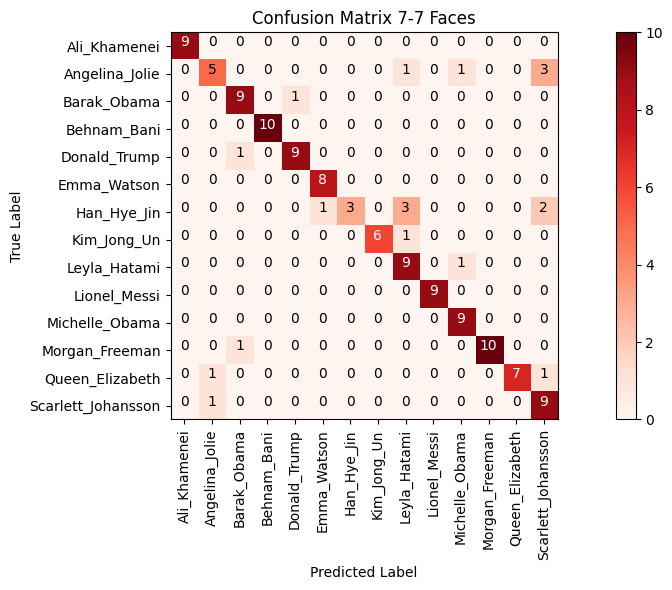

In [23]:
y_pred = model.predict(dataset_validation)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = dataset_validation.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,6))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix 7-7 Faces')
plt.colorbar()

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(dataset_validation.class_indices)), list(dataset_validation.class_indices.keys()), rotation=90)
plt.yticks(np.arange(len(dataset_validation.class_indices)), list(dataset_validation.class_indices.keys()))
plt.tight_layout()
plt.show()

In [24]:
model.save("model_7-7-Faces.h5")

'Ali_Khamenei': 0 \
'Angelina_Jolie': 1 \
'Barak_Obama': 2 \
'Behnam_Bani': 3 \
'Donald_Trump': 4 \
'Emma_Watson': 5 \
'Han_Hye_Jin': 6 \
'Kim_Jong_Un': 7 \
'Leyla_Hatami': 8 \
'Lionel_Messi': 9 \
'Michelle_Obama': 10 \
'Morgan_Freeman': 11 \
'Queen_Elizabeth': 12 \
'Scarlett_Johansson': 13

In [26]:
image = cv2.imread("test.png",1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image,(224,224))
image = image / 255.0
output = model.predict(image.reshape(1,224,224,3))
np.argmax(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


np.int64(4)

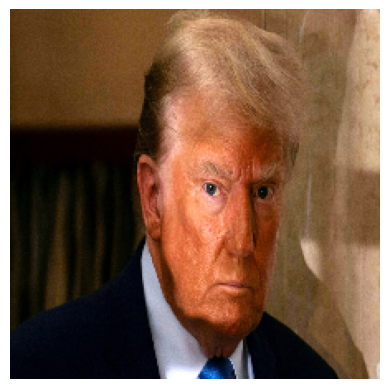

In [28]:
plt.imshow(image)
plt.axis("off")
plt.show()